# Data Segmentation : Using PCA to reduce dimensionality of climate data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# load data
import os

filename = "data-prep-exercise-results.csv"
# The file is already in comma separated format
climate = pd.read_csv(os.path.join(".", filename))

In [5]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 59 columns):
StoreID                     2127 non-null int64
City                        2127 non-null object
State                       2127 non-null object
Date Last Winter Freeze     2127 non-null object
Date First Winter Freeze    2127 non-null object
Growing Season Length       2127 non-null int64
Precip Jan                  2127 non-null float64
Precip Feb                  2127 non-null float64
Precip Mar                  2127 non-null float64
Precip Apr                  2127 non-null float64
Precip May                  2127 non-null float64
Precip Jun                  2127 non-null float64
Precip Jul                  2127 non-null float64
Precip Aug                  2127 non-null float64
Precip Sep                  2127 non-null float64
Precip Oct                  2127 non-null float64
Precip Nov                  2127 non-null float64
Precip Dec                  2127 non-null float64
R

Looking at column data, we'd like to reduce the dimensionality of weather/climate data to something have something easier to handle, and to comprehend. This will however be done by reducing each of Precip, Rain, Snow and Temp variables to principal component separately. Then the number of components to keep will be assessed by looking at the results and filtering out components that are less significant in term of overal variance.

In [11]:
# remove rows containing NaN (PCA cannot work with them)
climate_clean = climate.dropna(axis='index')

In [12]:
# write a helper function that filters out columns starting with one of Precip, Rain...
def filter_by_category(dataset, category='Precip'):
    # extract all dataset columns
    all_columns = list(dataset.columns.values)
    cat_columns = [col for col in all_columns if col.startswith(category)]
    
    return dataset[cat_columns]

precip_data = filter_by_category(climate_clean, category='Precip')

precip_data.head(5)

,Precip Jan,Precip Feb,Precip Mar,Precip Apr,Precip May,Precip Jun,Precip Jul,Precip Aug,Precip Sep,Precip Oct,Precip Nov,Precip Dec
0,1.192,1.272,4.202,2.588,5.432,8.994,5.750,4.912,10.580,2.944,2.656,2.052
1,1.012,2.182,2.738,4.568,4.256,12.356,5.502,7.712,10.848,2.720,1.656,1.834
2,0.996,2.344,2.818,3.856,4.006,9.900,4.958,7.250,9.696,2.814,1.616,2.442
3,0.982,2.494,2.850,2.634,3.558,6.152,4.100,6.542,8.082,2.930,1.510,3.242
4,1.320,1.046,1.260,1.016,2.018,4.812,3.556,1.406,7.106,2.460,1.118,1.720


In [13]:
rain_data = filter_by_category(climate_clean, category='Rain')
snow_data = filter_by_category(climate_clean, category='Snow')
temp_data = filter_by_category(climate_clean, category='Temp')

In [14]:
temp_data.head(5)

,Temp Jan,Temp Feb,Temp Mar,Temp Apr,Temp May,Temp Jun,Temp Jul,Temp Aug,Temp Sep,Temp Oct,Temp Nov,Temp Dec
0,65.98,66.69,70.07,73.21,77.35,80.36,81.42,81.50,80.88,77.28,72.51,67.88
1,68.10,69.10,72.40,75.70,79.60,82.40,83.70,83.60,82.40,78.80,74.40,69.90
2,69.44,70.33,73.68,76.49,80.39,83.16,84.82,84.78,83.63,80.18,75.86,71.36
3,67.63,68.20,71.03,74.20,78.20,81.17,82.63,82.87,81.93,78.70,74.17,69.57
4,59.69,62.44,68.37,73.20,78.61,82.27,83.47,83.49,81.17,76.20,69.24,61.44


## Dimensionality reduction of temperature data

Starting with temperature data, we'll use PCA to perform dimensionalaty reduction. We should see a distinction among cold and warm stores and from oceanic and continental cities.

In [15]:
from sklearn.preprocessing import scale

scale_temp = scale(temp_data)

In [16]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(scale_temp)

print(pca.explained_variance_ratio_)

[  9.17702776e-01   7.13184972e-02   4.87658990e-03   3.50249899e-03
   1.36540292e-03   5.86305166e-04   2.26711808e-04   2.15082080e-04
   8.88669223e-05   6.51909636e-05   3.07453573e-05   2.13325001e-05]


In [19]:
pca = PCA(n_components=2)
pca.fit(scale_temp)

print(pca.explained_variance_ratio_)

[ 0.91770278  0.0713185 ]


In [20]:
pca_temp = pca.transform(scale_temp)
pca_temp[:5]

array([[-7.11946005,  1.83372641],
       [-8.04695042,  1.55090742],
       [-8.55541457,  1.46537614],
       [-7.66512546,  1.74909111],
       [-6.87519119,  0.72515785]])

In [21]:
state_label = climate_clean["State"].values

In [22]:
for state, pca1, pca2 in zip(state_label, pca_temp[:, 0], pca_temp[:, 1]):
    print("{0}, {1}, {2}".format(state, pca1, pca2))

    

FL, -7.11946004514, 1.83372640689
FL, -8.04695041972, 1.5509074238
FL, -8.55541456948, 1.465376137
FL, -7.66512546416, 1.74909111465
TX, -6.87519119037, 0.725157850451
TX, -6.90938674188, 0.37706156771
FL, -7.02172092747, 1.50872310397
FL, -7.70444465388, 1.67771580087
TX, -7.35666706152, 0.143903797307
TX, -6.98549142739, 0.314166927579
TX, -6.91770822974, 0.363247581089
FL, -7.74305063677, 1.6139591606
FL, -7.796334881, 1.52300275063
FL, -7.74802147732, 1.60512952128
TX, -7.34004474067, 0.0315792438434
FL, -7.796334881, 1.52300275063
TX, -7.35697794249, 0.103864138884
TX, -7.43114189654, -0.0930972742313
FL, -7.66188457354, 1.56269457998
FL, -7.52143625967, 1.60450201183
FL, -7.02481873855, 1.44635273412
FL, -7.08604434781, 1.33974817639
FL, -7.30880928498, 1.65776071589
FL, -7.38863582982, 1.27846558486
FL, -7.14330191698, 1.69882639261
FL, -7.42814906861, 1.62851567841
FL, -7.01991932748, 1.25163159939
FL, -6.71017521307, 1.23423215158
FL, -6.6922949609, 1.23233899601
FL, -6.853604

In [34]:
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier

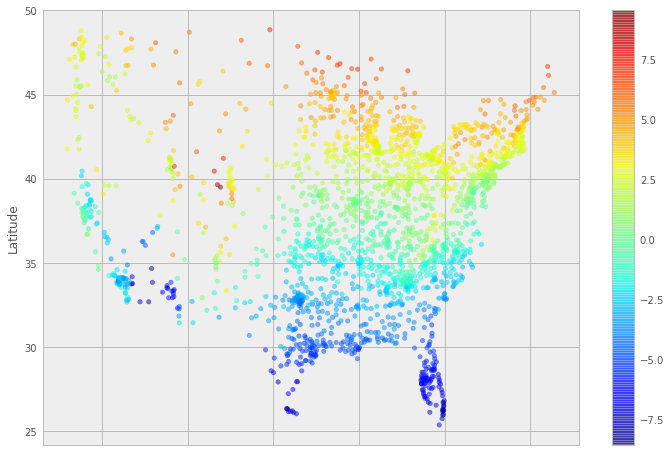

In [37]:
climate_clean.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.5,
                   c=pca_temp[:, 0],
                   cmap=plt.get_cmap('jet'), colorbar=True,
                   figsize=(12,8))
plt.legend()

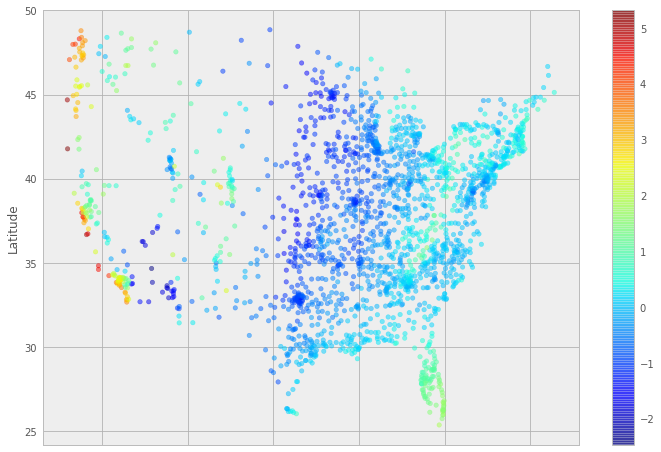

In [38]:
climate_clean.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.5,
                   c=pca_temp[:, 1],
                   cmap=plt.get_cmap('jet'), colorbar=True,
                   figsize=(12,8))
plt.legend()

## Dimensionality reduction of precipitation data

In [39]:
def map_pca_results(pca_data):
    """
    Map PCA results for retail problem.
    """
    climate_clean.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.5,
                   c=pca_data,
                   cmap=plt.get_cmap('jet'), colorbar=True,
                   figsize=(12,8))
    plt.legend()


In [40]:
scale_precip = scale(precip_data)
pca = PCA()
pca.fit(scale_precip)
print(pca.explained_variance_ratio_)

[ 0.50720968  0.2078426   0.09797049  0.04220927  0.03111463  0.02446678
  0.02255214  0.01890932  0.01591922  0.01272338  0.01130744  0.00777505]


In [41]:
pca.explained_variance_ratio_.cumsum()

array([ 0.50720968,  0.71505228,  0.81302277,  0.85523205,  0.88634668,
        0.91081346,  0.9333656 ,  0.95227491,  0.96819414,  0.98091751,
        0.99222495,  1.        ])

In [42]:
pca = PCA(n_components=3)
pca_precip = pca.fit_transform(scale_precip)
pca_precip[:5]

array([[ 1.90045508, -3.93918479,  0.87463675],
       [ 2.3221562 , -5.42393786,  1.19536738],
       [ 1.72520853, -4.21676444,  1.2582845 ],
       [ 0.70820075, -2.43538702,  1.4287413 ],
       [-2.12322541, -1.2638269 ,  0.8498371 ]])

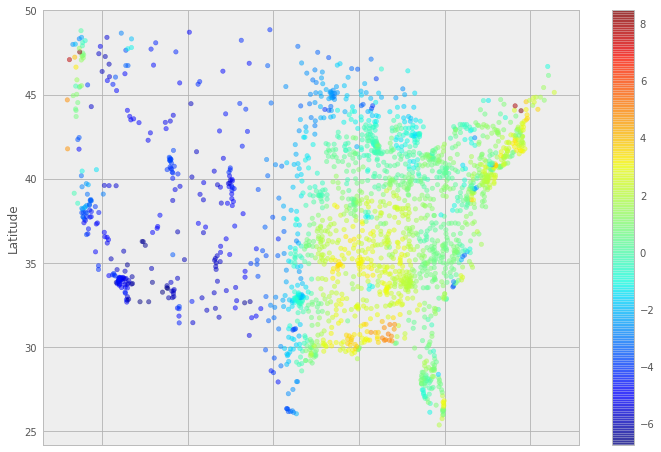

In [43]:
map_pca_results(pca_precip[:, 0])

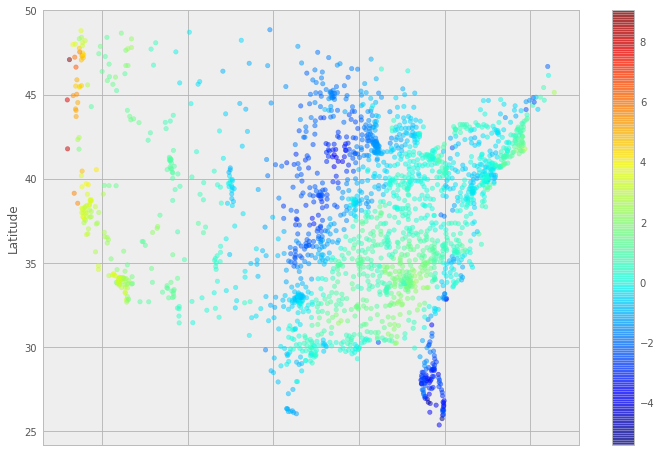

In [44]:
map_pca_results(pca_precip[:, 1])

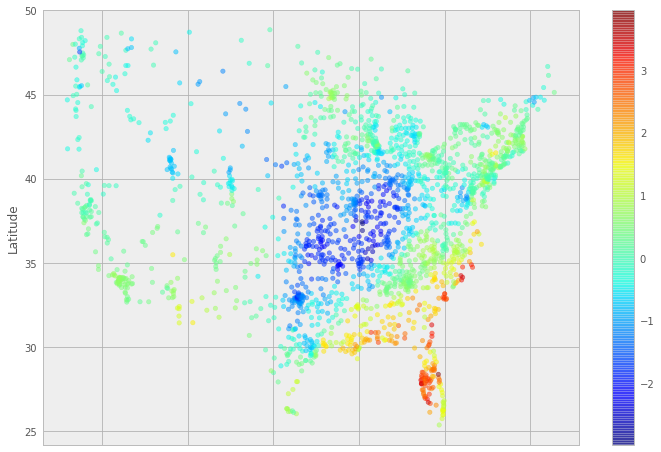

In [45]:
map_pca_results(pca_precip[:, 2])

## Dimensionality reduction of Snow data

In [46]:
scale_snow = scale(snow_data)
pca = PCA()
pca.fit(scale_snow)
print(pca.explained_variance_ratio_.cumsum())

[ 0.50400204  0.79455254  0.86458751  0.9044542   0.93087959  0.9512587
  0.96695454  0.98149674  0.99265637  1.          1.          1.        ]


In [48]:
pca = PCA(n_components=3)
pca_snow = pca.fit_transform(snow_data)
pca_snow[:5]

array([[-15.14901921,  -0.57900918,  -0.77664265],
       [-15.14901921,  -0.57900918,  -0.77664265],
       [-15.14901921,  -0.57900918,  -0.77664265],
       [-15.14901921,  -0.57900918,  -0.77664265],
       [-15.10309548,  -0.54549834,  -0.82498123]])

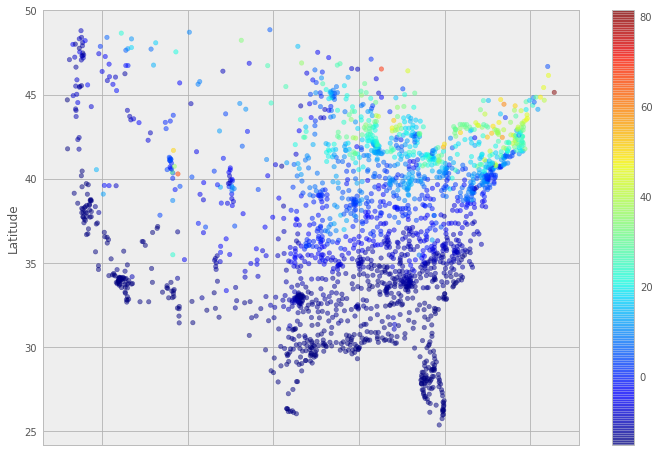

In [49]:
map_pca_results(pca_snow[:, 0])

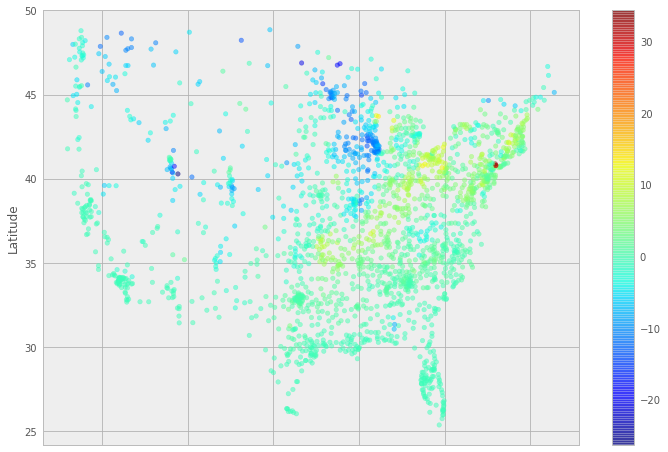

In [50]:
map_pca_results(pca_snow[:, 1])

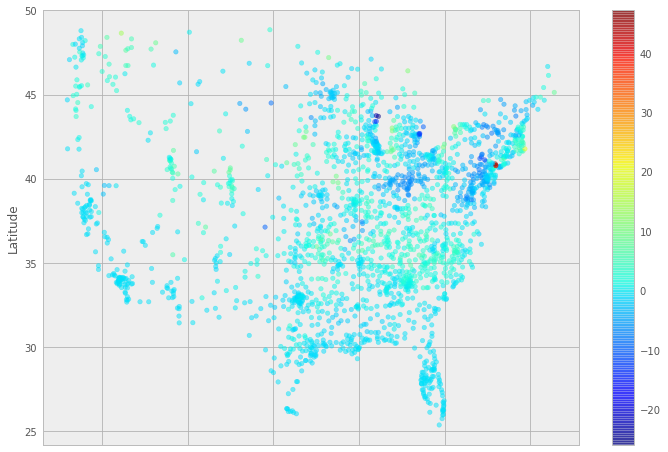

In [51]:
map_pca_results(pca_snow[:, 2])

## dimensionality reduction for rain data

In [58]:
scale_rain = scale(rain_data)

pca = PCA()
pca.fit(scale_rain)
print(pca.explained_variance_ratio_.cumsum())

[ 0.47349639  0.7103205   0.81441977  0.86252215  0.89254366  0.91683689
  0.93971501  0.95631687  0.97170436  0.98311197  0.99317916  1.        ]


In [63]:
print(scale_rain.shape[1])
np.arange(1, scale_rain.shape[1] + 1)

12


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

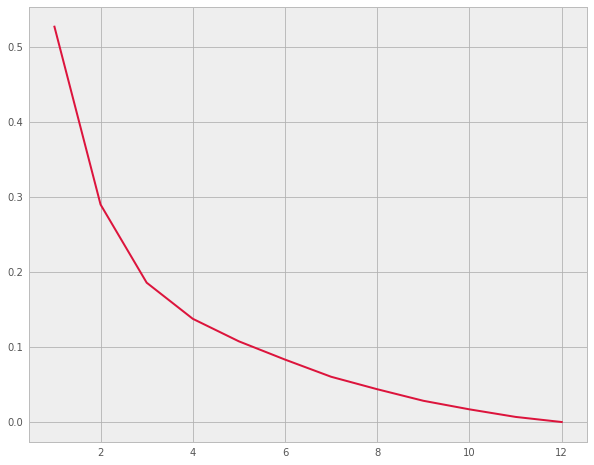

In [64]:
# plot scree plot
num_components = np.arange(1, scale_rain.shape[1] + 1)
plt.figure(figsize=(10,8))
plt.plot(num_components, 1 - pca.explained_variance_ratio_.cumsum(), lw=2, c='crimson')

In [54]:
pca = PCA(n_components=3)
pca_rain = pca.fit_transform(scale_rain)
pca_rain[:5]

array([[ 2.51697899, -3.24907577,  1.31896328],
       [ 2.8884692 , -4.59734113,  1.97915722],
       [ 2.26495037, -3.42132181,  1.89104866],
       [ 1.21471418, -1.68319256,  1.82985204],
       [-1.56550492, -0.67032321,  1.05757485]])

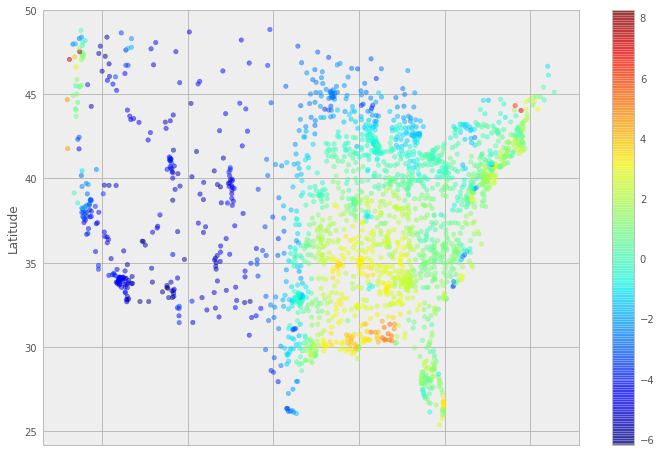

In [55]:
map_pca_results(pca_rain[:, 0])

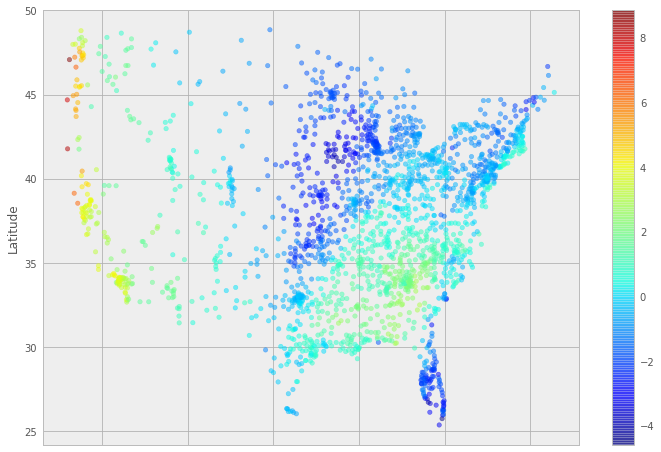

In [56]:
map_pca_results(pca_rain[:, 1])

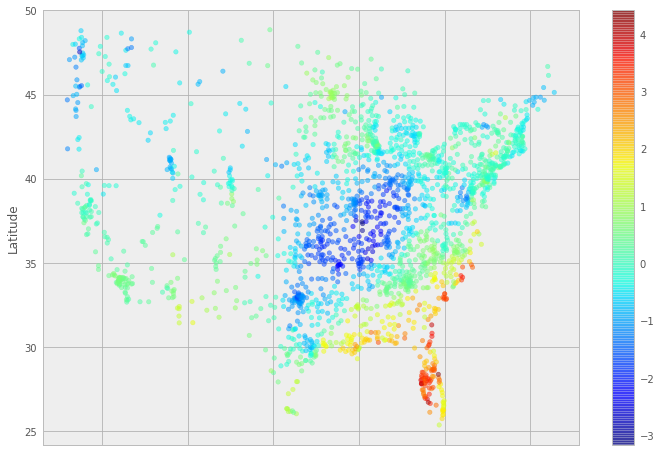

In [57]:
map_pca_results(pca_rain[:, 2])

## Wrapping-up: join dataset with PCA data

In [69]:
all_columns = list(climate_clean.columns.values)
categories = ['Precip', 'Rain', 'Snow', 'Temp']

cat_columns = [col for category in categories for col in all_columns if col.startswith(category)]

In [71]:
len(cat_columns)

48

In [73]:
cat_dict = {category : num_component for category, num_component in zip(categories, [3, 3, 3, 2])}
cat_dict

{'Precip': 3, 'Rain': 3, 'Snow': 3, 'Temp': 2}

In [79]:
new_cols = []
for cat, pca_comp in cat_dict.iteritems():
    for val in range(pca_comp):
        new_cols.append(cat + ' ' + str(val + 1))

new_cols

['Temp 1',
 'Temp 2',
 'Precip 1',
 'Precip 2',
 'Precip 3',
 'Snow 1',
 'Snow 2',
 'Snow 3',
 'Rain 1',
 'Rain 2',
 'Rain 3']

In [82]:
climate_new = climate_clean.drop(cat_columns, axis=1)

In [83]:
climate_new.head(5)

,StoreID,City,State,Date Last Winter Freeze,Date First Winter Freeze,Growing Season Length,Elevation,Longitude,Latitude,LastWinterFreezeDiff,FirstWinterFreezeDiff
0,3772,Florida City,FL,2009-02-02,2010-01-14,361,6.29,-80.649351,25.360858,-80,100
1,3785,Miami,FL,2009-01-18,2010-02-03,362,6.56,-80.311200,25.736641,-95,120
2,3770,Miami Gardens,FL,2009-01-28,2010-01-13,365,6.79,-80.245486,25.949315,-85,99
3,3762,Hallandale Beach,FL,2009-01-26,2010-01-13,365,4.59,-80.148327,25.985698,-87,99
4,3725,Port Isabel,TX,2009-02-07,2009-12-28,363,8.50,-97.303707,26.025517,-75,83


In [85]:
to_add = np.c_[pca_temp, pca_precip, pca_snow, pca_rain]

In [89]:
to_add = pd.DataFrame(to_add, columns=new_cols)

In [90]:
to_add.head(5)

,Temp 1,Temp 2,Precip 1,Precip 2,Precip 3,Snow 1,Snow 2,Snow 3,Rain 1,Rain 2,Rain 3
0,-7.119460,1.833726,1.900455,-3.939185,0.874637,-15.149019,-0.579009,-0.776643,2.516979,-3.249076,1.318963
1,-8.046950,1.550907,2.322156,-5.423938,1.195367,-15.149019,-0.579009,-0.776643,2.888469,-4.597341,1.979157
2,-8.555415,1.465376,1.725209,-4.216764,1.258284,-15.149019,-0.579009,-0.776643,2.264950,-3.421322,1.891049
3,-7.665125,1.749091,0.708201,-2.435387,1.428741,-15.149019,-0.579009,-0.776643,1.214714,-1.683193,1.829852
4,-6.875191,0.725158,-2.123225,-1.263827,0.849837,-15.103095,-0.545498,-0.824981,-1.565505,-0.670323,1.057575


In [93]:
climate_reduced = pd.concat([climate_new, to_add], axis=1)

In [94]:
climate_reduced.head(5)

,StoreID,City,State,Date Last Winter Freeze,Date First Winter Freeze,Growing Season Length,Elevation,Longitude,Latitude,LastWinterFreezeDiff,...,Temp 2,Precip 1,Precip 2,Precip 3,Snow 1,Snow 2,Snow 3,Rain 1,Rain 2,Rain 3
0,3772.0,Florida City,FL,2009-02-02,2010-01-14,361.0,6.29,-80.649351,25.360858,-80.0,...,1.833726,1.900455,-3.939185,0.874637,-15.149019,-0.579009,-0.776643,2.516979,-3.249076,1.318963
1,3785.0,Miami,FL,2009-01-18,2010-02-03,362.0,6.56,-80.311200,25.736641,-95.0,...,1.550907,2.322156,-5.423938,1.195367,-15.149019,-0.579009,-0.776643,2.888469,-4.597341,1.979157
2,3770.0,Miami Gardens,FL,2009-01-28,2010-01-13,365.0,6.79,-80.245486,25.949315,-85.0,...,1.465376,1.725209,-4.216764,1.258284,-15.149019,-0.579009,-0.776643,2.264950,-3.421322,1.891049
3,3762.0,Hallandale Beach,FL,2009-01-26,2010-01-13,365.0,4.59,-80.148327,25.985698,-87.0,...,1.749091,0.708201,-2.435387,1.428741,-15.149019,-0.579009,-0.776643,1.214714,-1.683193,1.829852
4,3725.0,Port Isabel,TX,2009-02-07,2009-12-28,363.0,8.50,-97.303707,26.025517,-75.0,...,0.725158,-2.123225,-1.263827,0.849837,-15.103095,-0.545498,-0.824981,-1.565505,-0.670323,1.057575


In [95]:
climate_reduced.to_csv('climate-data-pca.csv', index=False, header=True)

The data has been successful reduced of (48-11 =) 37 variables, and that should make clustering easier to apply!